In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.size'] = 10  # Match 12pt document font size
plt.rcParams['font.weight'] = 400

plt.rcParams['savefig.bbox'] = 'tight' # borderles pdf
plt.rcParams['svg.fonttype'] = 'none'  # selectable text
plt.rcParams['ps.fonttype'] = 42       # selectable text

plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.edgecolor'] = 'black'

In [4]:
# step sizes, for which the random walk is run
N = 1000
N_values = np.linspace(1, N, N)

In [5]:
def random_walk_2D(N, num_walks = 1000, step_size = 1.0):
  positions = np.zeros((num_walks, N, 2)) # save x/y coordinate after each step for each walk

  for walk_idx, _ in enumerate(range(num_walks)):
    angles = np.random.uniform(0, 2*np.pi, N)
    x_pos = np.cumsum(step_size * np.cos(angles))
    y_pos = np.cumsum(step_size * np.sin(angles))

    positions[walk_idx] = np.array([x_pos, y_pos]).T
  
  return positions

In [6]:
def mean_R_squared(N, num_walks = 1000):
  simulated_walk = random_walk_2D(N, num_walks)
  x = simulated_walk[:,:,0]
  y = simulated_walk[:,:,1]

  r_squared = x**2 + y**2
  return np.mean(r_squared, axis=0)

In [7]:
mean_squared_distance_10 = mean_R_squared(N, num_walks=10)
mean_squared_distance_100 = mean_R_squared(N, num_walks=100)
mean_squared_distance_1000 = mean_R_squared(N, num_walks=1000)
mean_squared_distance_5000 = mean_R_squared(N, num_walks=5000)

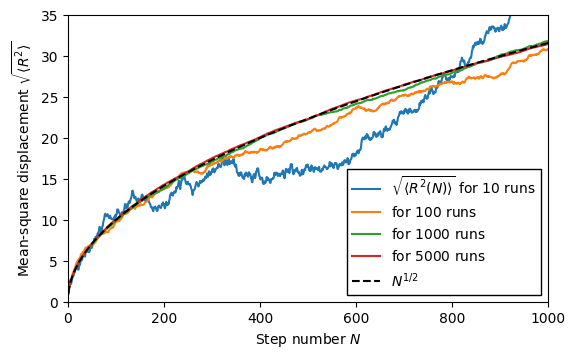

In [8]:
plt.figure(figsize=(6.202, 6.202 * 6/10))

plt.plot(N_values, np.sqrt(mean_squared_distance_10), label=r"$\sqrt{\langle R^2(N) \rangle}$ for $10$ runs")
plt.plot(N_values, np.sqrt(mean_squared_distance_100), label=r"for $100$ runs")
plt.plot(N_values, np.sqrt(mean_squared_distance_1000), label=r"for $1000$ runs")
plt.plot(N_values, np.sqrt(mean_squared_distance_5000), label=r"for $5000$ runs")

plt.plot(N_values, np.sqrt(N_values), "--", color="black", label=r"$N^{1/2}$")

plt.xlim(0, N)
plt.ylim(0, 35)

plt.xlabel(r"Step number $N$")
plt.ylabel(r"Mean-square displacement $\sqrt{\langle R^2\rangle}$")

plt.legend(loc="lower right")
# plt.savefig("mean-square-displacement.pdf", format="pdf", dpi=600)
plt.show()

## Show the trajectory of some random walks

In [9]:
simulated_walk = random_walk_2D(N, num_walks=5)

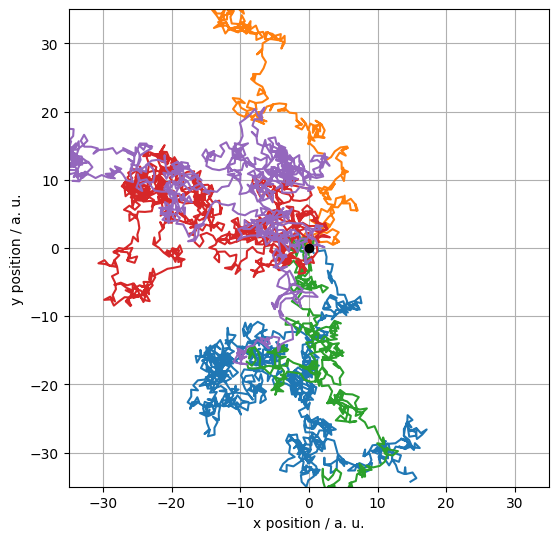

In [10]:
plt.figure(figsize=(6.202, 6.202))

plt.plot(simulated_walk[0,:,0], simulated_walk[0,:,1])
plt.plot(simulated_walk[1,:,0], simulated_walk[1,:,1])
plt.plot(simulated_walk[2,:,0], simulated_walk[2,:,1])
plt.plot(simulated_walk[3,:,0], simulated_walk[3,:,1])
plt.plot(simulated_walk[4,:,0], simulated_walk[4,:,1])


plt.plot([0], [0], "o", color="black")

plt.xlim(-35, 35)
plt.ylim(-35, 35)

plt.xlabel("x position / a. u.")
plt.ylabel("y position / a. u.")

plt.grid()
# plt.savefig("random-walk.pdf", format="pdf", dpi=600)
plt.show()

## Show the mean end position of some random walks
The expected value should be around $\langle x\rangle=\langle y \rangle = 0$

In [11]:
num_walks = 5000

displacement_walks = random_walk_2D(N, num_walks=num_walks)
mean_end_position = np.mean(displacement_walks, axis=0)
std_end_position = np.std(displacement_walks, axis=0)

x_mean, y_mean = mean_end_position[:,0], mean_end_position[:,1]
x_std, y_std = std_end_position[:,0] / np.sqrt(num_walks), std_end_position[:,1] / np.sqrt(num_walks)

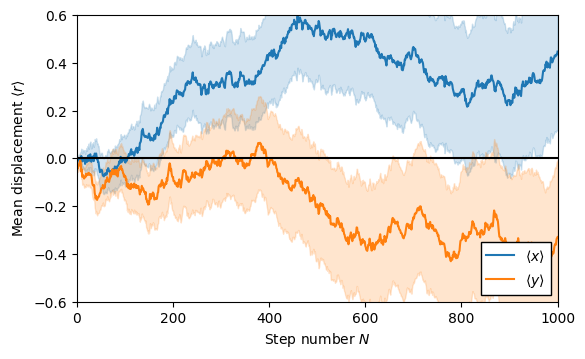

In [12]:
plt.figure(figsize=(6.202, 6.202 * 6/10))

plt.plot(N_values, x_mean, label=r"$\langle x \rangle$")
plt.plot(N_values, y_mean, label=r"$\langle y \rangle$")
# plt.plot(N_values, np.sqrt(N_values), "--", color="black", label=r"$N^{1/2}$")

plt.fill_between(N_values, 
                 np.array(x_mean) - np.array(x_std), 
                 np.array(x_mean) + np.array(x_std), 
                 color='C0', alpha=0.2)

plt.fill_between(N_values, 
                 np.array(y_mean) - np.array(y_std), 
                 np.array(y_mean) + np.array(y_std), 
                 color='C1', alpha=0.2)

plt.hlines(0, 0, 1000, color="black")

plt.xlim(0, N)
plt.ylim(-0.6, 0.6)

plt.xlabel(r"Step number $N$")
plt.ylabel(r"Mean displacement $\langle r \rangle$")

plt.legend(loc="lower right")
# plt.savefig("mean-displacement.pdf", format="pdf", dpi=600)
plt.show()

## Distribution of the final positions

In [13]:
# end points after N=1000 steps
end_points = displacement_walks[:,-1,:]

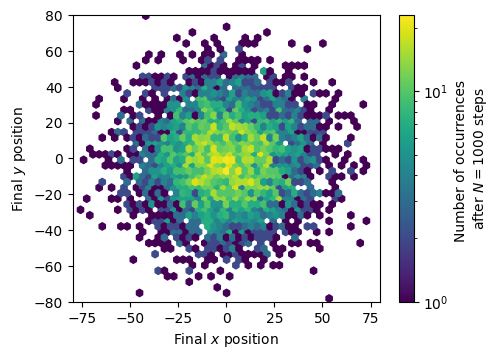

In [14]:
plt.figure(figsize=(6.202 * 8/10, 6.202 * 6/10))

plt.hexbin(end_points[:,0], end_points[:,1], gridsize=50, bins='log')
plt.colorbar(label='Number of occurrences \nafter $N=1000$ steps')

plt.xlabel('Final $x$ position')
plt.ylabel('Final $y$ position')

plt.xlim(-80, 80)
plt.ylim(-80, 80)

# plt.savefig("final-position.pdf", format="pdf", dpi=600)
plt.show()

The $x$ distribution is theoretically given by $p(x) = \mathcal{N}(0, N/2)$ after $N$ steps with step-size $1$.
and thus is given explicitly by
$$
p(x) = \frac{1}{\sqrt{\pi N}} \exp\left(-\frac{x^2}{N}\right)
$$

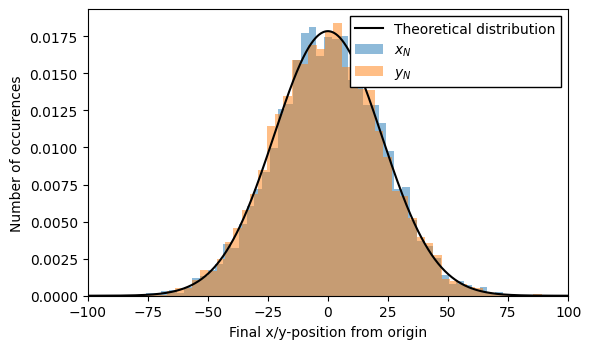

In [37]:
final_x_distances = end_points[:,0]
final_y_distances = end_points[:,1]

plt.figure(figsize=(6.202, 6.202 * 6/10))

r = np.linspace(-100, 100, 1000)
plt.plot(r, 1/np.sqrt(np.pi * N) * np.exp(-r**2 / N), color="black", label="Theoretical distribution")

plt.hist(final_x_distances, density=True, bins=50, color="C0", alpha=0.5, label="$x_N$")
plt.hist(final_y_distances, density=True,bins=50, color="C1", alpha=0.5, label="$y_N$")

plt.xlabel('Final x/y-position from origin')
plt.ylabel('Number of occurences')

plt.xlim(-100, 100)

plt.legend(loc="upper right")
plt.savefig("x-distribution.pdf", format="pdf", dpi=600)
plt.show()